<a href="https://colab.research.google.com/github/Durgaprasadkudupudi/FMML_PROJECT_AND_LABS/blob/main/FMML_Module4_Lab3_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [5]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

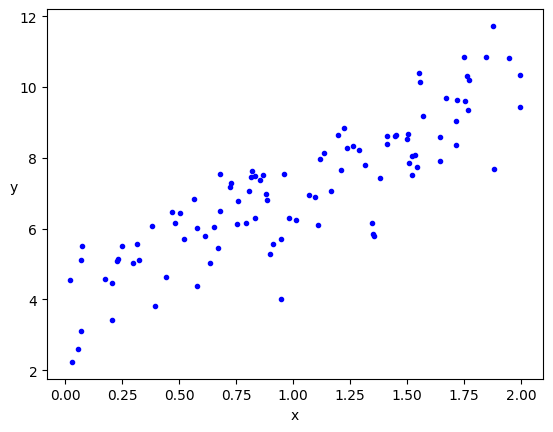

In [6]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [7]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [8]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [9]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.409
y_pred[1]: 3.548
Final error: 5092.120


Plotting the error vs Number of iterations

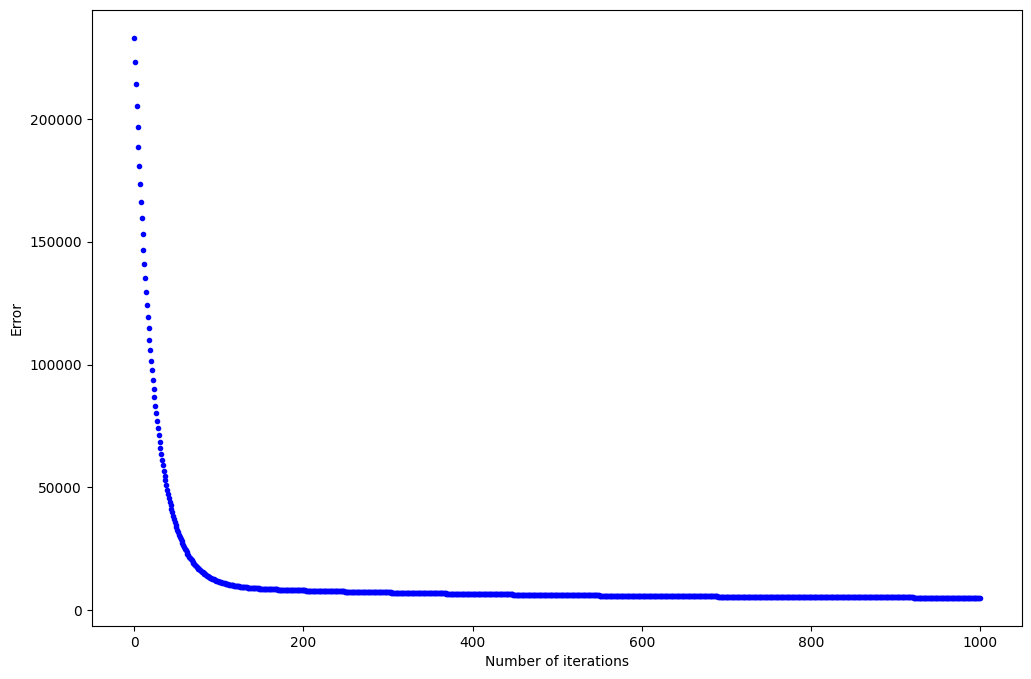

In [10]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

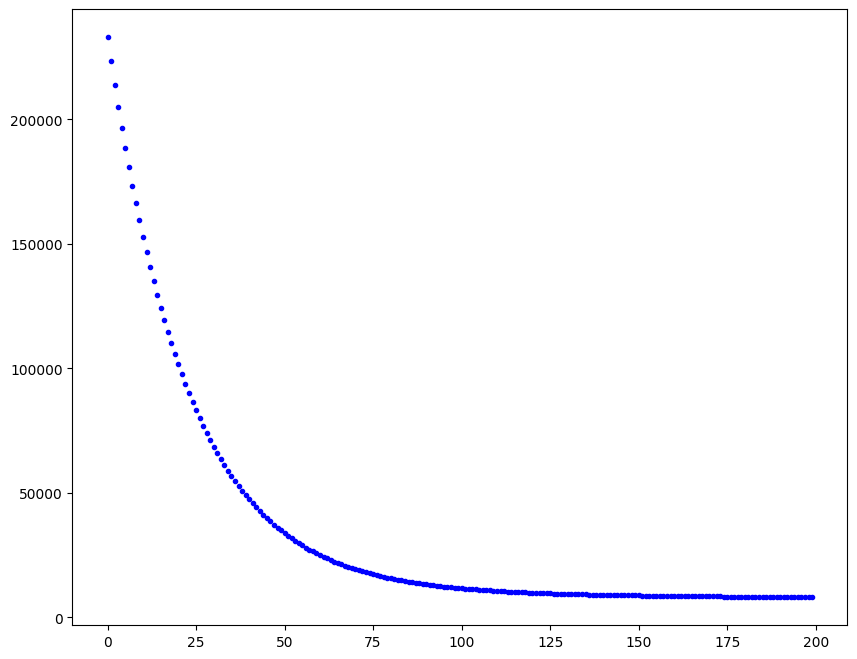

In [11]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [12]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [13]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.892
y_pred[1]: 3.057
Final error: 57.436


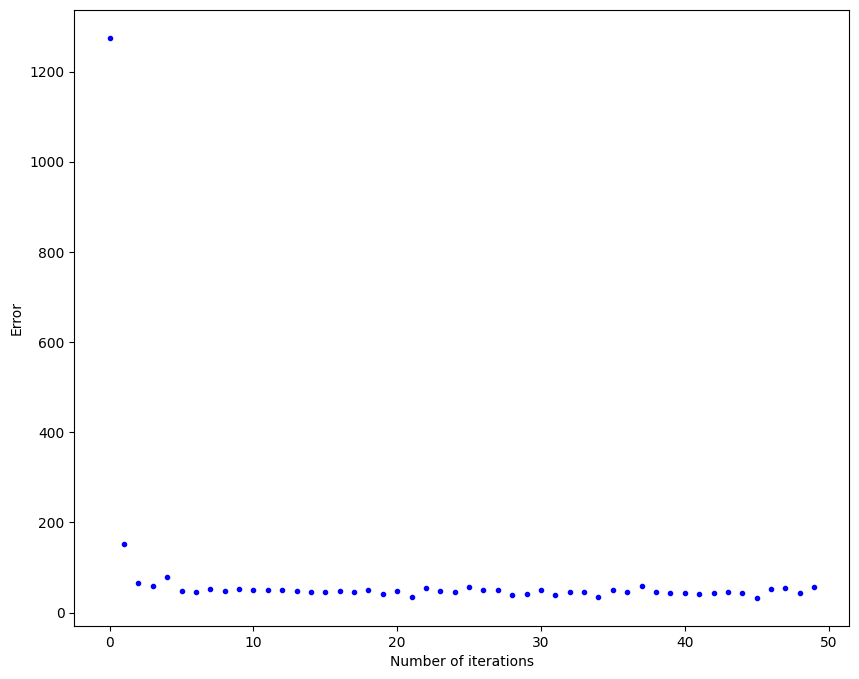

In [14]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [15]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [16]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.927
y_pred[1]: 3.105
Final error: 942.337


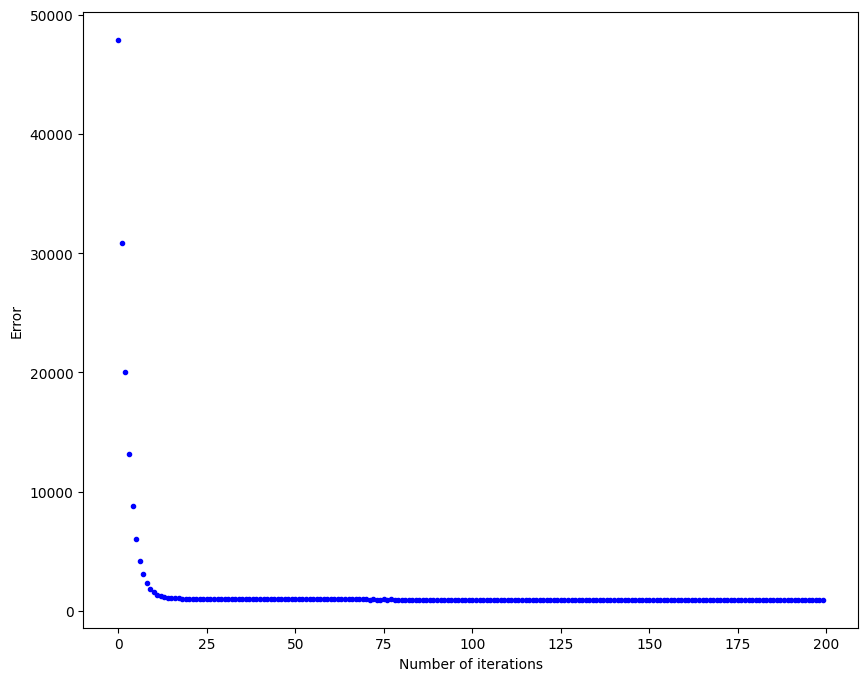

In [17]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

1.In mini-batch gradient descent, the batch size refers to the number of training examples used in each iteration to update the model's parameters. Changing the batch size can have implications for the training process, including computational efficiency and the quality of the learned model.

Here are some considerations when changing the batch size:

Computational Efficiency:

Larger batch sizes often lead to faster training times because you can take advantage of parallel processing on modern hardware.
Smaller batch sizes may result in slower training times, but they might be necessary if the dataset is too large to fit into memory.
Stochasticity and Noise:

Smaller batch sizes introduce more randomness into the parameter updates since each batch is a smaller sample of the overall dataset.
Larger batch sizes provide a more stable estimate of the gradient but might miss out on some local structure in the data.
Memory Constraints:

If your dataset is large, you might be limited by the amount of available memory. In such cases, you might need to use a smaller batch size.
Convergence Behavior:

The choice of batch size can affect the convergence behavior of the training process. Smaller batch sizes might result in faster convergence, but larger batch sizes might provide a smoother convergence.
Generalization:

Smaller batch sizes can sometimes improve generalization by preventing the model from overfitting to the training data.
Larger batch sizes may lead to faster convergence but could result in overfitting.
Here's how you can change the batch size in practice:

In deep learning frameworks like TensorFlow or PyTorch, you can usually specify the batch size when creating or configuring the data loader or iterator.

Example in PyTorch:

python
Copy code
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=new_batch_size, shuffle=True)
When implementing custom optimization algorithms, you need to modify the code that processes each mini-batch.

Experimenting with different batch sizes and monitoring the training/validation performance is often necessary to determine the optimal batch size for a specific problem. It's a hyperparameter that should be tuned based on the characteristics of your data and the requirements of your model.

In [18]:
#2
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a simple neural network model
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(4,)),
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Experiment with different batch sizes
batch_sizes = [32, 64, 128]

for batch_size in batch_sizes:
    print(f"\nTraining with batch size: {batch_size}")

    # Fit the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    # Print results
    print(f'Test accuracy with batch size {batch_size}: {test_acc:.4f}')


Training with batch size: 32
Test accuracy with batch size 32: 0.9000

Training with batch size: 64
Test accuracy with batch size 64: 0.9000

Training with batch size: 128
Test accuracy with batch size 128: 0.9333


3.Changing the learning rate in Batch Gradient Descent (BGD), Stochastic Gradient Descent (SGD), and Mini-batch Gradient Descent (MBGD) can have different effects on the training process. The learning rate is a critical hyperparameter that influences the step size during parameter updates. Below, I'll discuss the effects of changing the learning rate in each optimization algorithm:

Batch Gradient Descent (BGD):
Effect of Increasing Learning Rate:

If the learning rate is too high, BGD may overshoot the optimal values for the parameters and fail to converge. This can lead to oscillations or divergence in the cost function.
Conversely, if the learning rate is too low, BGD might take a long time to converge or get stuck in a suboptimal solution.
Stochastic Gradient Descent (SGD):
Effect of Increasing Learning Rate:

In SGD, each parameter update is based on a single training example. Increasing the learning rate can result in faster convergence, as updates are applied more aggressively.
However, a very high learning rate might lead to instability and cause the algorithm to oscillate or diverge. It may also make the algorithm sensitive to noise in individual examples.
Mini-batch Gradient Descent (MBGD):
Effect of Increasing Learning Rate:

MBGD combines aspects of both BGD and SGD. It processes a mini-batch of examples in each iteration.
A higher learning rate in MBGD can speed up convergence compared to a very small learning rate. It can take advantage of the computational efficiency of mini-batch processing.
Similar to BGD and SGD, setting the learning rate too high in MBGD can result in overshooting and convergence issues.
Comparison:
Convergence Speed:

BGD generally has smoother convergence, and changing the learning rate has a more gradual effect.
SGD and MBGD, with higher learning rates, can converge faster, but they might exhibit more oscillations due to the random sampling of examples.
Stability:

BGD is more stable but might be computationally expensive for large datasets.
SGD and MBGD with very high learning rates can be less stable and may require tuning to find an optimal rate.
Noise Sensitivity:

SGD and MBGD are more sensitive to noise in the data due to the use of random subsets (mini-batches or single examples).
BGD is less affected by noise since it considers the entire dataset in each iteration.
Practical Considerations:
It's common to perform a learning rate search, trying different values and monitoring the training process to find the one that balances convergence speed and stability.
Learning rate schedules or adaptive learning rate methods (e.g., Adam, RMSprop) can be useful in adjusting the learning rate during training.
In practice, the optimal learning rate may vary for different datasets and models. Therefore, it's essential to experiment with different learning rates and monitor the training performance to find the most suitable value.